In [80]:
import cv2
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from tqdm import tqdm
def rotateImage(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [10]:
img = cv2.imread("/home/caliban/lucid_hyperbole/avsa000/images/avsa005.jpg")

In [3]:
cv2.imshow('HelloWorld', img)
cv2.waitKey(0) 
cv2.destroyWindow('HelloWorld')

In [27]:
img[(c[0]-50):(c[0]+50),(c[1]-50):(c[1]+50)]

array([[[171, 166, 141],
        [158, 151, 126],
        [167, 159, 136],
        ...,
        [194, 194, 178],
        [166, 163, 148],
        [156, 151, 130]],

       [[154, 149, 124],
        [163, 156, 131],
        [201, 193, 170],
        ...,
        [158, 155, 140],
        [207, 204, 189],
        [199, 194, 173]],

       [[162, 157, 132],
        [207, 202, 177],
        [174, 169, 144],
        ...,
        [161, 155, 136],
        [161, 155, 136],
        [202, 201, 181]],

       ...,

       [[177, 184, 177],
        [172, 178, 173],
        [177, 183, 178],
        ...,
        [194, 204, 204],
        [194, 204, 204],
        [195, 203, 203]],

       [[174, 181, 176],
        [184, 189, 187],
        [159, 166, 163],
        ...,
        [192, 202, 202],
        [190, 200, 200],
        [189, 197, 197]],

       [[198, 205, 200],
        [165, 170, 168],
        [181, 188, 185],
        ...,
        [190, 200, 200],
        [188, 198, 198],
        [187, 195, 195]]

In [68]:
img.shape

(1297, 2313, 3)

In [65]:
c = [654,1161]

In [66]:
img_0 = img[(c[0]-50):(c[0]+50),(c[1]-50):(c[1]+50)]

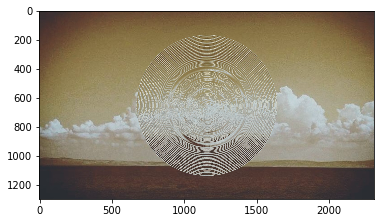

In [71]:
plt.imshow(img)

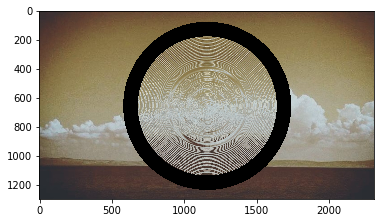

In [161]:
plt.imshow(np.multiply(hcn,img))

In [146]:
hcn.sum()

0

In [135]:
hc = np.zeros(img.shape[:-1],dtype="uint8")
hcp1 = np.zeros(img.shape,dtype="uint8")
hcp2 = np.zeros(img.shape,dtype="uint8")

hcn = np.zeros(img.shape,dtype="uint8")

In [160]:
for i in tqdm(range(img.shape[0])):
    for j in range(img.shape[1]):
        r2 = (c[0]-i)**2 + (c[1]-j)**2
        if (r2<(580**2)) and (r2>(480**2)):
            if (j<c[1]):
                hcp1[i][j]=np.array([1,1,1],dtype='uint8')
            elif (j>=c[1]):
                hcp2[i][j]=np.array([1,1,1],dtype='uint8')
        else:
            hcn[i][j]=np.array([1,1,1],dtype='uint8')
          

100%|██████████| 1297/1297 [00:11<00:00, 117.55it/s]


In [155]:
hcp2.sum(),hcp1.sum(),hcn.sum()

(499821, 499227, 0)

In [128]:
r = np.multiply(img,hcn)

In [167]:
for i in tqdm(range(360)):
    rif = cv2.imread("/home/caliban/lucid_hyperbole/avsa000/images/avsa_005_rotate_f/frame_{0}.jpg".format(i))
    rib = cv2.imread("/home/caliban/lucid_hyperbole/avsa000/images/avsa_005_rotate_b/frame_{0}.jpg".format(i))
    temp = np.multiply(hcp1,rif)+np.multiply(hcp2,rib)+np.multiply(hcn,img)
    cv2.imwrite("/home/caliban/lucid_hyperbole/avsa000/images/avsa_005_rotate_seg_double/frame_{0}.jpg".format(i),temp)


100%|██████████| 360/360 [00:52<00:00,  7.11it/s]


In [165]:
rif = cv2.imread("/home/caliban/lucid_hyperbole/avsa000/images/avsa_005_rotate_f/frame_{0}.jpg".format(50))
rib = cv2.imread("/home/caliban/lucid_hyperbole/avsa000/images/avsa_005_rotate_b/frame_{0}.jpg".format(50))
temp = np.multiply(hcp1,rif)+np.multiply(hcp2,rib)+np.multiply(hcn,img)

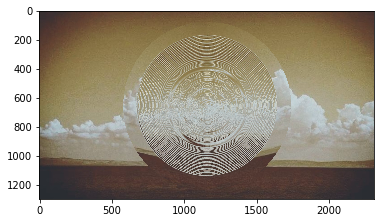

In [166]:
plt.imshow(temp)

In [88]:
hc.shape

(1297, 2313)

In [137]:
for i in range(360):
    cv2.imwrite("/home/caliban/lucid_hyperbole/avsa000/images/avsa_005_rotate_f/frame_{0}.jpg".format(i),rotateImage(img,-(i)*0.25))
    cv2.imwrite("/home/caliban/lucid_hyperbole/avsa000/images/avsa_005_rotate_b/frame_{0}.jpg".format(i),rotateImage(img,(i)*0.25))


In [20]:
2313/1297,16/9

(1.7833461835003854, 1.7777777777777777)

In [29]:
img.shape,img_0.shape

((1297, 2313, 3), (100, 100, 3))

In [4]:
img_array =[]

In [5]:
for i in tqdm(range(300)):
    tmp = np.zeros(img.shape)
    for j in range(img.shape[0]):
        for k in range(img.shape[1]):
            if (j<800) and ((k>=450) and (k<500)):
                tmp[j][k] = img_0[j+i][k-450]                
            else:
                tmp[j][k] = img[j][k]

    cv2.imwrite("/home/caliban/lucid_hyperbole/avsa000/images/slide_test/frame_{0}.jpg".format(i),tmp)
    

100%|██████████| 300/300 [15:05<00:00,  2.83s/it]


In [12]:
r = img_array[6].astype("int32")

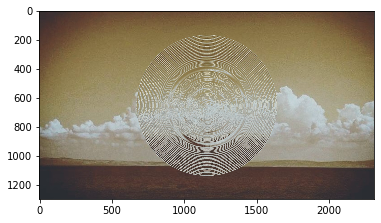

In [13]:
plt.imshow(r)

In [17]:
#for i in range(len(l)):
#        img = cv2.imread('{1}r/{2}{0}.{3}'.format(i,tempdir,file_prefix,t_img_format))
#        height, width, layers = img.shape
#        size = (width,height)
#        img_array.append(img)
height, width, layers = img.shape
size = (width,height)

print(len(img_array),size)
out = cv2.VideoWriter('{0}{1}.{2}'.format("/home/caliban/lucid_hyperbole/avsa000/videos/","break_test","mp4"),cv2.VideoWriter_fourcc(*'MP4V'), 30, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()
    #shutil.rmtree(tempdir)

300 (2313, 1297)
